In [1]:
#!pip install --upgrade pip
#!pip install --upgrade notebook
#!pip install --upgrade platformdirs
#!pip install --user tqdm
#!pip show tqdm
#!pip show numpy
#!which python
#!which pip

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm, trange

In [3]:
%matplotlib inline

In [4]:
train_n = 100
test_n = 1000
d = 100

In [5]:
def generate_data():
    X_train = np.random.normal(0,1, size=(train_n,d))
    w_true = np.random.normal(0,1, size=(d,1))
    y_train = X_train.dot(w_true) + np.random.normal(0,0.5,size=(train_n,1))
    X_test = np.random.normal(0,1, size=(test_n,d))
    y_test = X_test.dot(w_true) + np.random.normal(0,0.5,size=(test_n,1))
    return w_true, X_train, y_train, X_test, y_test

# 3.1

In [6]:
def normalized_error(X, y, w):
    
    # implementation
    
    X_w_dot_prod = X @ w
    numerator = np.linalg.norm(X_w_dot_prod - y)
    denominator = np.linalg.norm(y)
    
    return numerator / denominator

show=True

f_hat_train, f_hat_test = [], []

for t in range(10):

    # implementation

    # Generate new data for each trial
    w_true, X_train, y_train, X_test, y_test = generate_data()

    if show == True:
        # print once as all iterations have the sample size.
        print("w_true shape:", w_true.shape)
        print("X_train shape:", X_train.shape)
        print("y_train shape:", y_train.shape)
        print("X_test shape:", X_test.shape)
        print("y_test shape:", y_test.shape)
        print()
        show=False

    #find w = X^-1 y 
    w_train = np.linalg.inv(X_train) @ y_train 
    
    # Calculate normalized error for training data
    f_hat_train.append(normalized_error(X_train, y_train, w_train))

    # Calculate normalized error for test data
    f_hat_test.append(normalized_error(X_test, y_test, w_train))  # REMINDER: double-check in office hours 

print(f"Normalized train error (linalg soln): {np.mean(f_hat_train):.5e}")
print(f"Normalized test error (linalg soln): {np.mean(f_hat_test):.5e}")

w_true shape: (100, 1)
X_train shape: (100, 100)
y_train shape: (100, 1)
X_test shape: (1000, 100)
y_test shape: (1000, 1)

Normalized train error (linalg soln): 1.16646e-13
Normalized test error (linalg soln): 5.00664e+00


# 3.2

In [7]:
def l2_reg_closed_form(X, y, l):
	return np.linalg.inv(X.T.dot(X) + l * np.identity(D)).dot(X.T).dot(y)

avg_f_hat_train_per_l: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
avg_f_hat_test_per_l: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


  0%|          | 0/10 [00:00<?, ?it/s]

t: 0

l_idx: 0
l_reg: 0.0005
****
l_idx: 1
l_reg: 0.005
****
l_idx: 2
l_reg: 0.05
****
l_idx: 3
l_reg: 0.5
****
l_idx: 4
l_reg: 5
****
l_idx: 5
l_reg: 50
****
l_idx: 6
l_reg: 500
****
--------------
t: 1

l_idx: 0
l_reg: 0.0005
****
l_idx: 1
l_reg: 0.005
****
l_idx: 2
l_reg: 0.05
****
l_idx: 3
l_reg: 0.5
****
l_idx: 4
l_reg: 5
****
l_idx: 5
l_reg: 50
****
l_idx: 6
l_reg: 500
****
--------------
t: 2

l_idx: 0
l_reg: 0.0005
****
l_idx: 1
l_reg: 0.005
****
l_idx: 2
l_reg: 0.05
****
l_idx: 3
l_reg: 0.5
****
l_idx: 4
l_reg: 5
****
l_idx: 5
l_reg: 50
****
l_idx: 6
l_reg: 500
****
--------------
t: 3

l_idx: 0
l_reg: 0.0005
****
l_idx: 1
l_reg: 0.005
****
l_idx: 2
l_reg: 0.05
****
l_idx: 3
l_reg: 0.5
****
l_idx: 4
l_reg: 5
****
l_idx: 5
l_reg: 50
****
l_idx: 6
l_reg: 500
****
--------------
t: 4

l_idx: 0
l_reg: 0.0005
****
l_idx: 1
l_reg: 0.005
****
l_idx: 2
l_reg: 0.05
****
l_idx: 3
l_reg: 0.5
****
l_idx: 4
l_reg: 5
****
l_idx: 5
l_reg: 50
****
l_idx: 6
l_reg: 500
****
--------------
t: 5


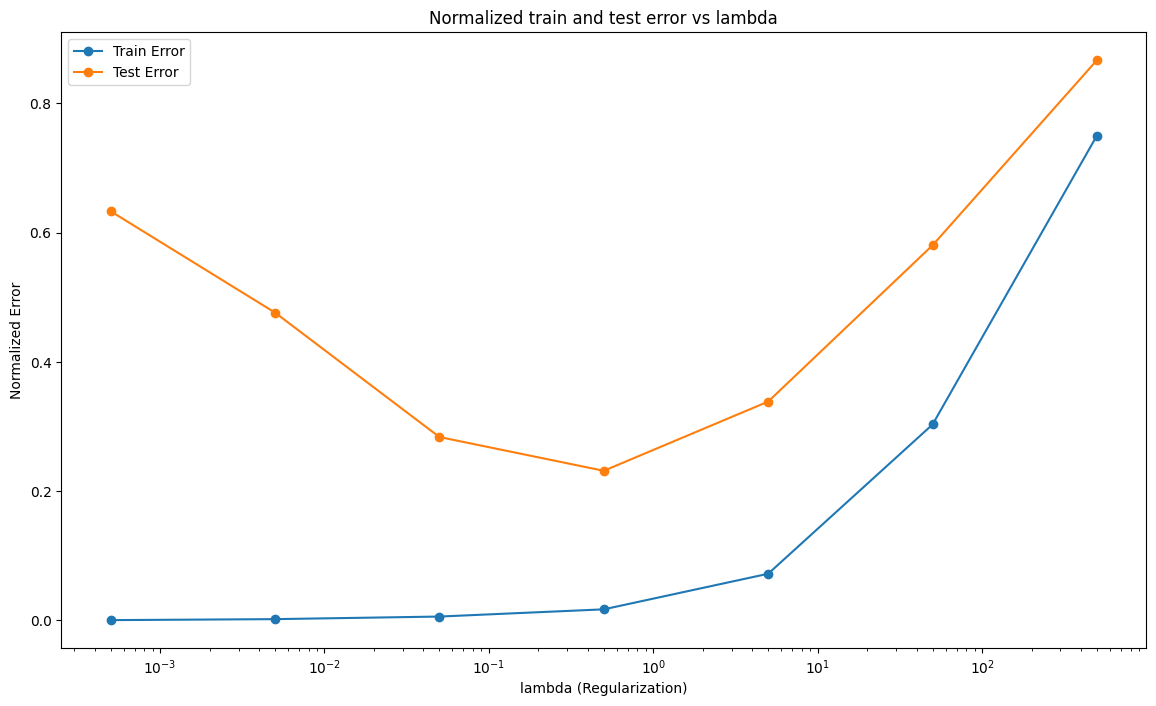

In [8]:
n_trials = 10
l_reg_list = [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]
avg_f_hat_train_per_l, avg_f_hat_test_per_l = [0.0]* len(l_reg_list), [0.0]* len(l_reg_list)

print("avg_f_hat_train_per_l:", avg_f_hat_train_per_l)
print("avg_f_hat_test_per_l:", avg_f_hat_test_per_l)

for t in trange(n_trials):
    
    w_true, X_train, y_train, X_test, y_test = generate_data()
    D = X_train.shape[1]  # Number of features to create an identity matrix 

    print("t:", t)
    print()

    for l_idx, l_reg in enumerate(l_reg_list):

        print("l_idx:", l_idx)
        print("l_reg:", l_reg)
        print("****")

        #implementation and update of avg_f_hat_train_per_l, avg_f_hat_test_per_l
        
        # w = (X^T X + λ I)^−1 X^T y closed form of sum i=1 to m (w^T xi − yi)^2 + λ ∥w∥^2 _2.
        # a closed-form solution means that we can directly calculate the optimal parameter vector w without needing to perform iterative optimization algorithms like gradient descent. Instead, we have a formula that gives use w directly.
        
        w = np.linalg.inv(X_train.T.dot(X_train) + l_reg * np.identity(D)) @ X_train.T @ y_train
        
        # Calculate normalized errors for training and testing sets
        train_error = normalized_error(X_train, y_train, w)
        test_error = normalized_error(X_test, y_test, w)
        
        # Update average errors lists
        avg_f_hat_train_per_l[l_idx] += train_error / n_trials
        avg_f_hat_test_per_l[l_idx] += test_error / n_trials
        
    print("--------------")

fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
axs.plot(l_reg_list, avg_f_hat_train_per_l, marker='o', label='Train Error')
axs.plot(l_reg_list, avg_f_hat_test_per_l, marker='o', label='Test Error')
axs.set_xscale('log')
axs.set_xlabel('lambda (Regularization)')
axs.set_ylabel('Normalized Error')
axs.set_title('Normalized train and test error vs lambda')
axs.legend()

print(f"Normalized train error (L2 linalg soln): {avg_f_hat_train_per_l}")
print(f"Normalized test error (L2 linalg soln): {avg_f_hat_test_per_l}")

# 3.3

In [9]:
def sgd(X, y, w, step_size, n_steps):
   
    for _ in trange(n_steps):

            # SGD implementation 

            # instead of using the entire dataset to compute the gradient at each step, only a single randomly chosen data point (or a small batch of data points) is used. 
            # The objective function for a single data point is fi(w) = (w^T xi - yi)^2 
            # gradient is ∇ fi(w):  w <- w- η ∇~fi(w)
        
            # Randomly choose one data point
            random_index = np.random.randint(0, X.shape[0]-1)
            
            x_random = X[random_index]
            y_random = y[random_index]  
        
            # Calculate the gradient of the squared error for the chosen data point
            residual = w.T @ x_random - y_random
            
            gradient = 2 * residual * x_random.reshape(-1, 1) # x_random.reshape(-1, 1) ensures that x_random is treated as a column vector
    
            # Update the weight vector using stochastic gradient descent
            w = w - step_size * gradient
        
    return w

In [10]:
n_trials = 10
step_size_list = [5e-5, 5e-4, 5e-3]
avg_f_hat_train_per_ss, avg_f_hat_test_per_ss = [0.0]* len(step_size_list), [0.0]* len(step_size_list)

print("avg_f_hat_train_per_ss:", avg_f_hat_train_per_ss)
print("avg_f_hat_test_per_ss:", avg_f_hat_test_per_ss)
    
for t in trange(n_trials, desc="Trail #"):
    w_true, X_train, y_train, X_test, y_test = generate_data()

    for ss_idx, step_size in enumerate(step_size_list):
        
        # implementation and update of avg_f_hat_train_per_ss, avg_f_hat_test_per_ss
        dimention_1 = X_train.shape[1]
        dimention_2 = 1
        
        w = np.zeros((dimention_1, dimention_2))
        
        w = sgd(X_train, y_train, w, step_size, n_steps=10000000)

        train_error = normalized_error(X_train, y_train, w)
        test_error = normalized_error(X_test, y_test, w)

        avg_f_hat_train_per_ss[ss_idx] += train_error / n_trials
        avg_f_hat_test_per_ss[ss_idx] += test_error / n_trials
    
print(f"Normalized train error (SGD): {avg_f_hat_train_per_ss}")
print(f"Normalized test error (SGD): {avg_f_hat_test_per_ss}")

avg_f_hat_train_per_ss: [0.0, 0.0, 0.0]
avg_f_hat_test_per_ss: [0.0, 0.0, 0.0]


Trail #:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/10000000 [00:00<?, ?it/s]

Normalized train error (SGD): [0.029795197782270733, 0.05063163601276059, 0.05221789042081825]
Normalized test error (SGD): [0.2812344640295312, 0.3740636755663128, 0.6175905173210307]


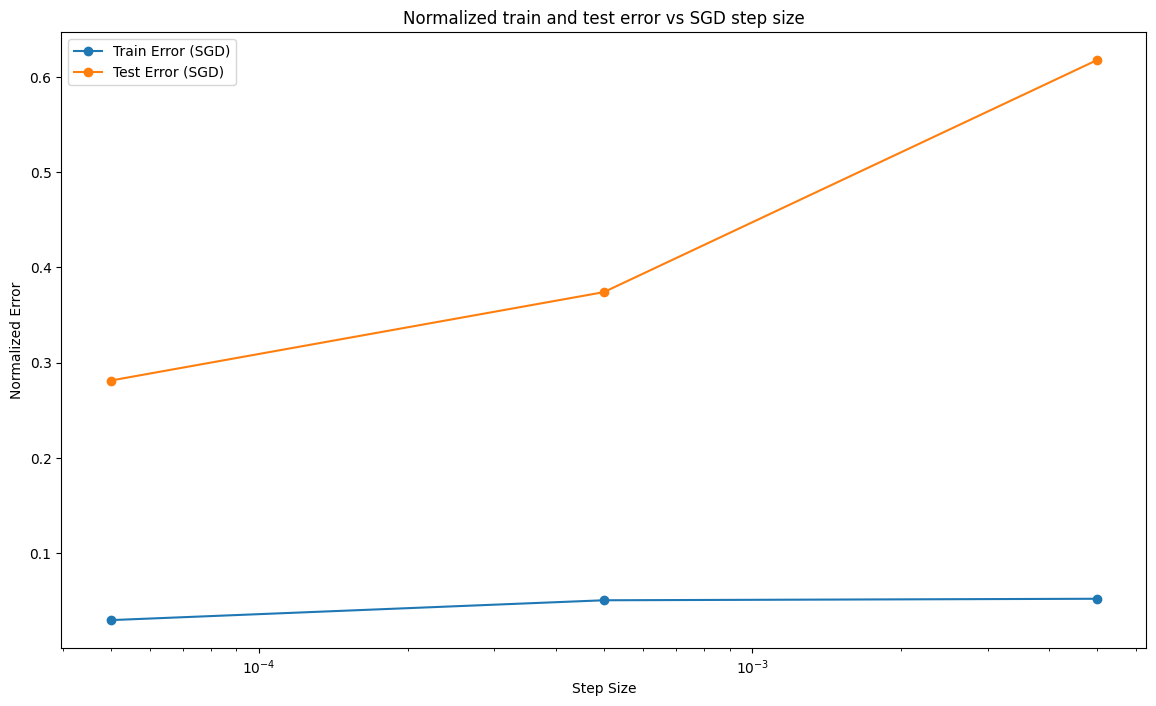

In [11]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
axs.plot(step_size_list, avg_f_hat_train_per_ss, marker='o', label='Train Error (SGD)')
axs.plot(step_size_list, avg_f_hat_test_per_ss, marker='o', label='Test Error (SGD)')
axs.set_xscale('log')
axs.set_xlabel('Step Size')
axs.set_ylabel('Normalized Error')
axs.set_title('Normalized train and test error vs SGD step size')
axs.legend()

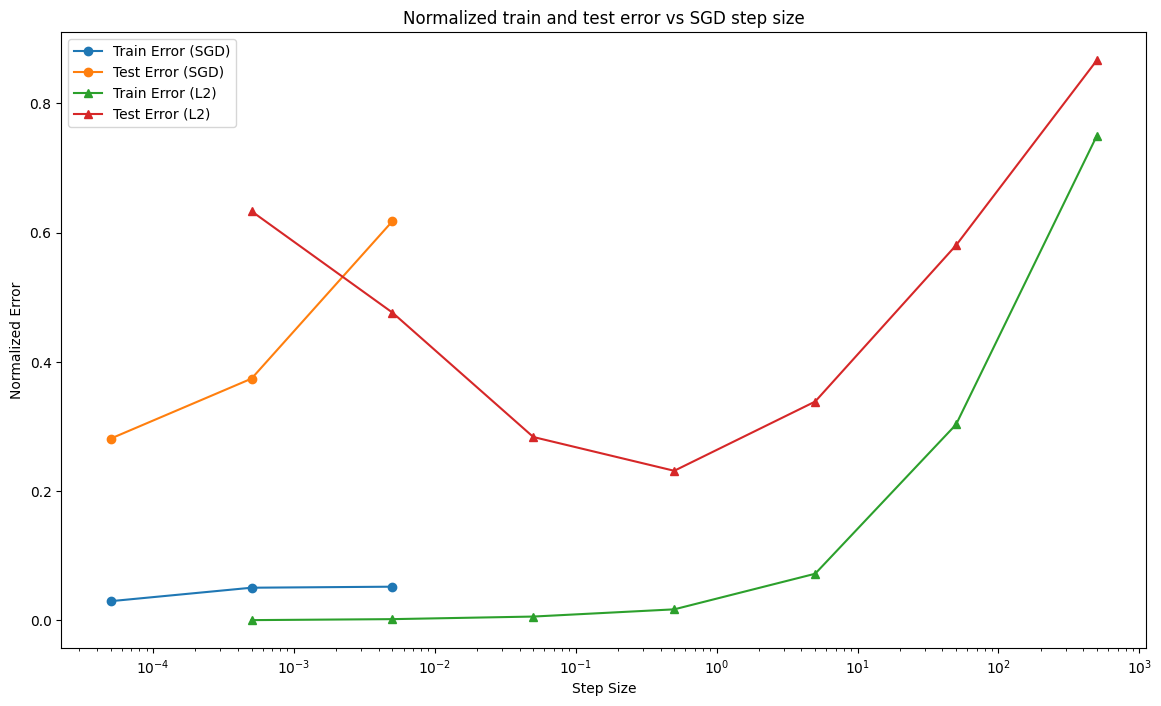

In [12]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
axs.plot(step_size_list, avg_f_hat_train_per_ss, marker='o', label='Train Error (SGD)')
axs.plot(step_size_list, avg_f_hat_test_per_ss, marker='o', label='Test Error (SGD)')
axs.plot(l_reg_list, avg_f_hat_train_per_l, marker='^', label='Train Error (L2)')
axs.plot(l_reg_list, avg_f_hat_test_per_l, marker='^', label='Test Error (L2)')
axs.set_xscale('log')
axs.set_xlabel('Step Size')
axs.set_ylabel('Normalized Error')
axs.set_title('Normalized train and test error vs SGD step size')
axs.legend()

# 3.4

In [13]:
def sgd_w_tracking(X, y, X_te, y_te, w, step_size, n_steps, eval_every=100):
    train_errs, test_errs, w_norms = [], [], []
    print(f"Step size: {step_size}")
    for step_ctr in trange(n_steps, desc="SGD iteration"):

        # TODO: implement and update train_errs, test_errs, w_norms

        # Calculate normalized training error
        trainError = normalized_error(X, y, w)
        train_errs.append(trainError)
        
        # Calculate normalized test error every 'eval_every' iterations
        if step_ctr % eval_every == 0:
            testError = normalized_error(X_te, y_te, w)
            test_errs.append(testError)
        
        # Calculate L2 norm of the weight vector
        w_norm = np.linalg.norm(w)
        w_norms.append(w_norm)
        
        # Update weights using SGD (similar to the last section)
        random_index = np.random.randint(0, X.shape[0]-1)
        x_random = X[random_index]
        y_random = y[random_index]
        residual = w.T @ x_random - y_random
        gradient = 2 * residual * x_random.reshape(-1, 1)
        w = w - step_size * gradient
    
    return w, train_errs, test_errs, w_norms

In [14]:
step_size_list = [5e-5, 5e-3]
f_hat_train_trend_per_ss, f_hat_test_trend_per_ss, w_norm_trend = [None]* len(step_size_list), [None]* len(step_size_list), [None]* len(step_size_list)
f_hat_train_true, f_hat_test_true = [], []
    
w_true, X_train, y_train, X_test, y_test = generate_data()
f_hat_train_true = normalized_error(X_train, y_train, w_true)
f_hat_test_true = normalized_error(X_test, y_test, w_true)

for ss_idx, step_size in enumerate(step_size_list):
    
    # TODO: compute w_est, train_errors, test_errors, w_est_norms for each step size
    dimention_1 = X_train.shape[1]
    dimention_2 = 1
    
    w_init = np.zeros((dimention_1, dimention_2))
    w_est, train_errors, test_errors, w_est_norms = sgd_w_tracking(X_train, y_train, X_test, y_test, w_init, step_size, n_steps=1000000, eval_every=100)

    f_hat_train_trend_per_ss[ss_idx] = train_errors
    f_hat_test_trend_per_ss[ss_idx] = test_errors
    w_norm_trend[ss_idx] = w_est_norms

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 0.005


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

### 3.4 (i)

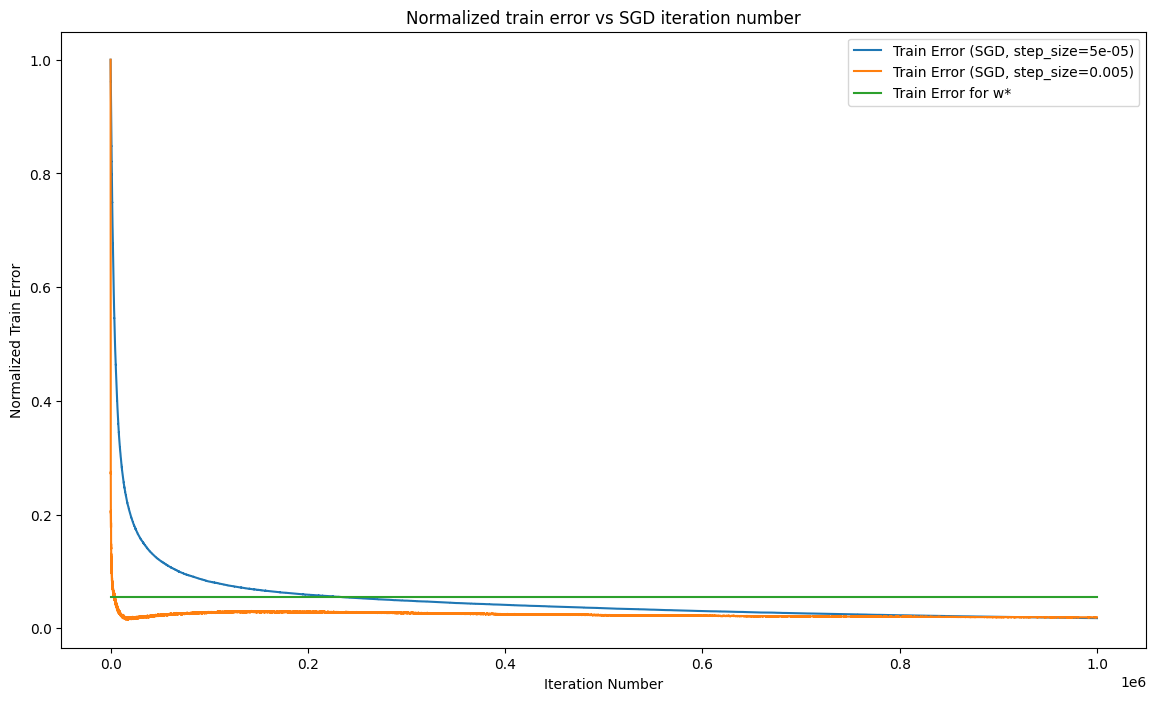

In [15]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
for ss_idx, step_size in enumerate(step_size_list):
    axs.plot(np.arange(1000000), f_hat_train_trend_per_ss[ss_idx],
             label=f'Train Error (SGD, step_size={step_size})')

axs.plot([0, 1000000], [f_hat_train_true, f_hat_train_true], label='Train Error for w*')

axs.set_xlabel('Iteration Number')
axs.set_ylabel('Normalized Train Error')
axs.set_title('Normalized train error vs SGD iteration number')
axs.legend()

### 3.4 (ii)

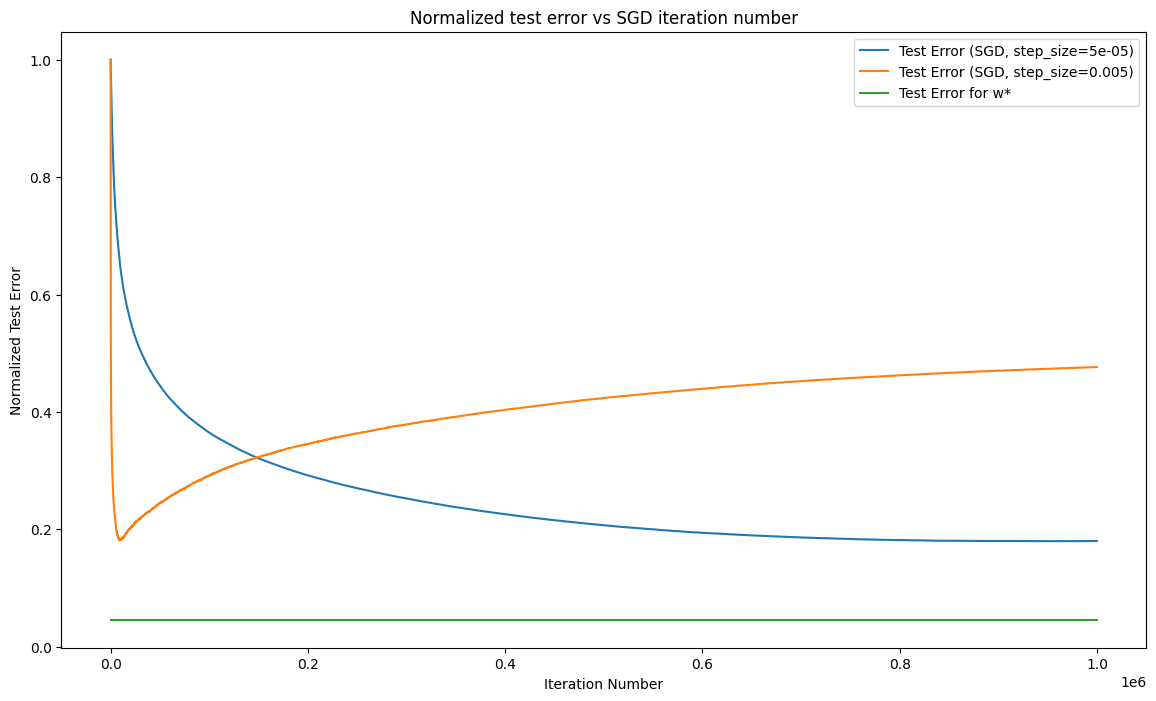

In [16]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
for ss_idx, step_size in enumerate(step_size_list):
    axs.plot(np.arange(1000000, step=100), f_hat_test_trend_per_ss[ss_idx],
             label=f'Test Error (SGD, step_size={step_size})')

axs.plot([0, 1000000], [f_hat_test_true, f_hat_test_true], label='Test Error for w*')

axs.set_xlabel('Iteration Number')
axs.set_ylabel('Normalized Test Error')
axs.set_title('Normalized test error vs SGD iteration number')
axs.legend()

### 3.4 (iii)

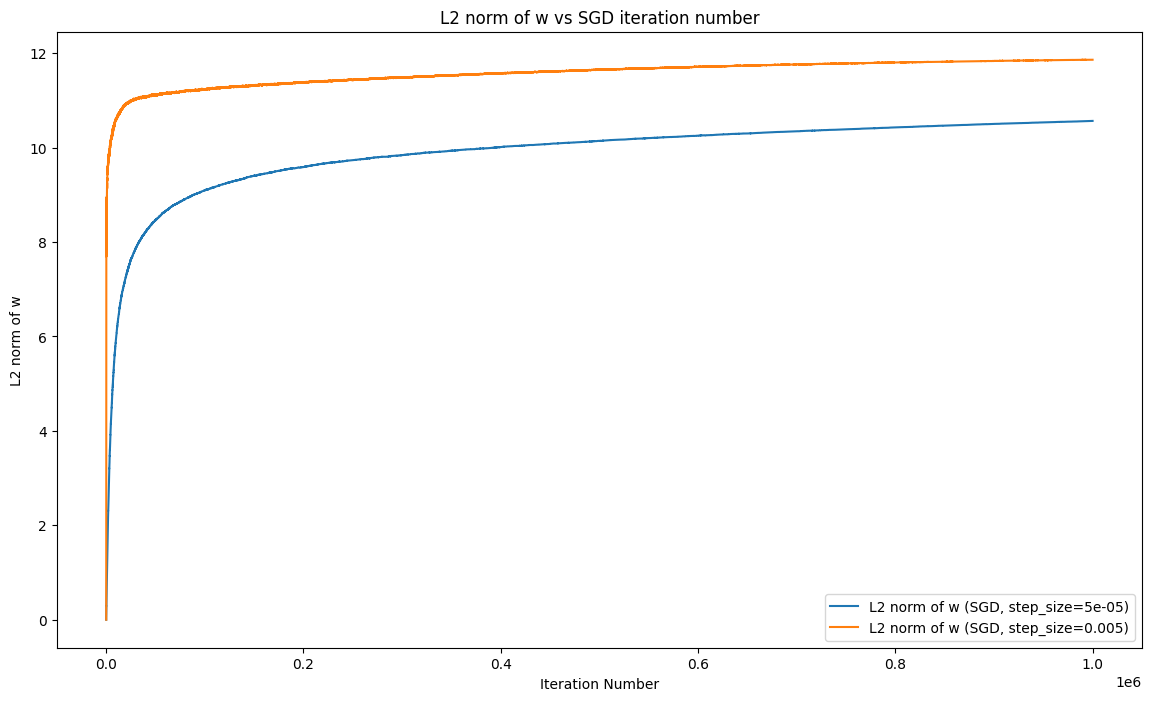

In [17]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
for ss_idx, step_size in enumerate(step_size_list):
    axs.plot(np.arange(1000000), w_norm_trend[ss_idx],
             label=f'L2 norm of w (SGD, step_size={step_size})')

axs.set_xlabel('Iteration Number')
axs.set_ylabel('L2 norm of w')
axs.set_title('L2 norm of w vs SGD iteration number')
axs.legend()

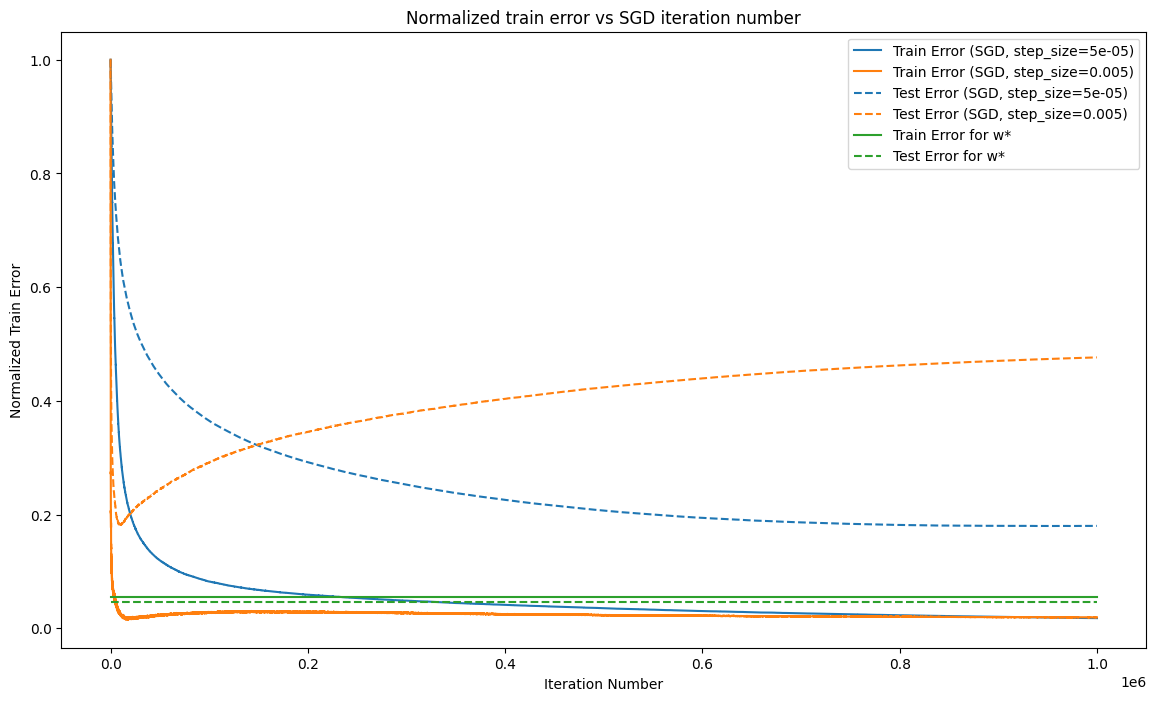

In [18]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
for ss_idx, step_size in enumerate(step_size_list):
    axs.plot(np.arange(1000000), f_hat_train_trend_per_ss[ss_idx], f'C{ss_idx}',
             label=f'Train Error (SGD, step_size={step_size})')

for ss_idx, step_size in enumerate(step_size_list):
    axs.plot(np.arange(1000000, step=100), f_hat_test_trend_per_ss[ss_idx], f'C{ss_idx}--',
             label=f'Test Error (SGD, step_size={step_size})')

axs.plot([0, 1000000], [f_hat_train_true, f_hat_train_true], 'C2', label='Train Error for w*')
axs.plot([0, 1000000], [f_hat_test_true, f_hat_test_true], 'C2--', label='Test Error for w*')

axs.set_xlabel('Iteration Number')
axs.set_ylabel('Normalized Train Error')
axs.set_title('Normalized train error vs SGD iteration number')
axs.legend()

# 3.5

Extension of 3.4

In [19]:
n_trials = 10
r_list = [0, 0.1, 0.5, 1, 10, 20, 30]
avg_f_hat_train_per_r, avg_f_hat_test_per_r, w_norm_per_r = [0.0]* len(r_list), [0.0]* len(r_list), [0.0]* len(r_list)
    
for t in trange(n_trials, desc="Trail #"):
   
    # TODO: implement and update avg_f_hat_train_per_r, avg_f_hat_test_per_r, w_norm_per_r
   
    for r_idx, r in enumerate(r_list):

        # Initialize weights randomly from the d-dimensional sphere with radius r
        d=X_train.shape[1]
        standard_gaussian_random_point = np.random.normal(0, 1, d)  # Sample from standard Gaussian
        l2_norm_result = np.linalg.norm(standard_gaussian_random_point)  # Compute L2 norm
        normalized_standard_gaussian_random_point = (r / l2_norm_result) * standard_gaussian_random_point  # Renormalize to have L2 norm r
        w_normalized_standard_gaussian_random_point = normalized_standard_gaussian_random_point

        #We will now examine the effect of the starting point on the SGD solution -> using the same sgd_w_tracking() function
        w_est, train_errors, test_errors, w_est_norms = sgd_w_tracking(X_train, y_train, X_test, y_test, w_normalized_standard_gaussian_random_point, step_size=0.00005, n_steps=1000000, eval_every=100)
        
        avg_f_hat_train_per_r[r_idx] += np.mean(train_errors) / n_trials
        avg_f_hat_test_per_r[r_idx] += np.mean(test_errors) / n_trials
        w_norm_per_r[r_idx] += np.mean(w_est_norms) / n_trials

print(f"Normalized train error (SGD): {avg_f_hat_train_per_r}")
print(f"Normalized test error (SGD): {avg_f_hat_test_per_r}")

Trail #:   0%|          | 0/10 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Step size: 5e-05


SGD iteration:   0%|          | 0/1000000 [00:00<?, ?it/s]

Normalized train error (SGD): [0.5040187361334532, 0.5038437361137018, 0.5037020261870137, 0.5047188349138545, 0.6385804209765533, 0.928602112515119, 1.2651574048682195]
Normalized test error (SGD): [2.4754860561048786, 2.475925218080327, 2.477558906230681, 2.4878141702029417, 3.5258748305242418, 5.605025152998356, 7.901037401558897]


Normalized train error (SGD): [0.5040187361334532, 0.5038437361137018, 0.5037020261870137, 0.5047188349138545, 0.6385804209765533, 0.928602112515119, 1.2651574048682195]
Normalized test error (SGD): [2.4754860561048786, 2.475925218080327, 2.477558906230681, 2.4878141702029417, 3.5258748305242418, 5.605025152998356, 7.901037401558897]


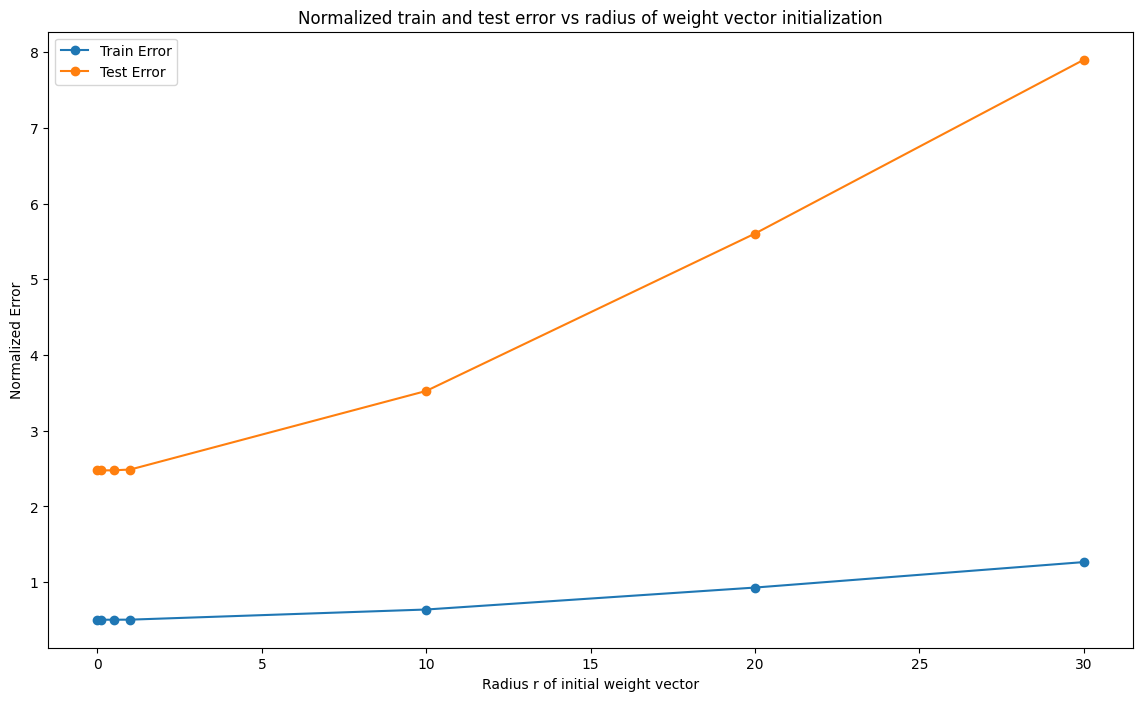

In [20]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
axs.plot(r_list, avg_f_hat_train_per_r, marker='o', label='Train Error')
axs.plot(r_list, avg_f_hat_test_per_r, marker='o', label='Test Error')

axs.set_xlabel('Radius r of initial weight vector')
axs.set_ylabel('Normalized Error')
axs.set_title('Normalized train and test error vs radius of weight vector initialization')
axs.legend()

print(f"Normalized train error (SGD): {avg_f_hat_train_per_r}")
print(f"Normalized test error (SGD): {avg_f_hat_test_per_r}")

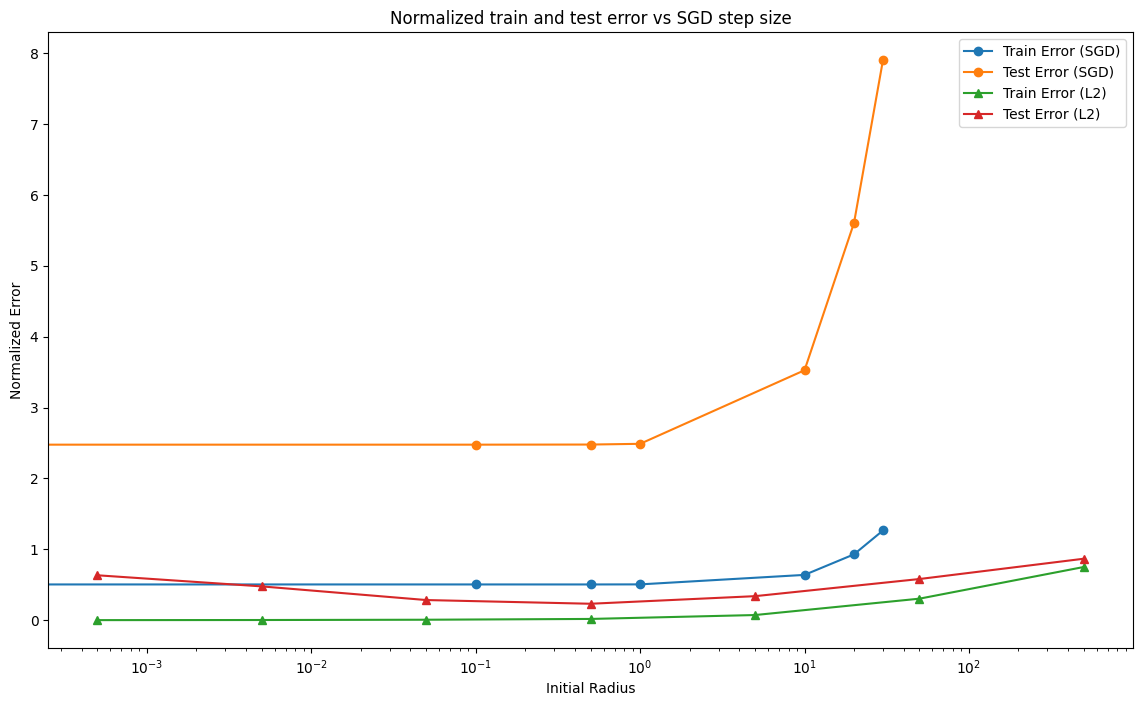

In [21]:
fig, axs = plt.subplots()
fig.set_size_inches(14, 8)
axs.plot(r_list, avg_f_hat_train_per_r, marker='o', label='Train Error (SGD)')
axs.plot(r_list, avg_f_hat_test_per_r, marker='o', label='Test Error (SGD)')
axs.plot(l_reg_list, avg_f_hat_train_per_l, marker='^', label='Train Error (L2)')
axs.plot(l_reg_list, avg_f_hat_test_per_l, marker='^', label='Test Error (L2)')
axs.set_xscale('log')
axs.set_xlabel('Initial Radius')
axs.set_ylabel('Normalized Error')
axs.set_title('Normalized train and test error vs SGD step size')
axs.legend()